In [23]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import jieba
import nltk
#from gensim.models import Word2Vec
from nltk import ngrams
import numpy as np
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

sentences = set()

for greeting in ['hi', 'hello', 'hey', 'hey there']:
    for message in ['how are you?', 'what are you up to?', "how's it going?"]:
        total_message = greeting + ' ' + message
        sentences.update([total_message])

for greeting in ["what up", 'what up today?', 'whats up today',
                 'what are you up to this morning', 'what are you up to today']:
        total_message = greeting
        sentences.update([total_message])
sentences.update(['stupid spam message'])

# wds = set()
# bigrams=set()
# trigrams=set()
features=pd.DataFrame()
for idx, sentence in enumerate(sentences):
    for n in range(1, 4):
        grams = ngrams(sentence.split(), n)
        for g in grams:
            if g not in features.columns:
                features[g] = 0
            features.loc[idx,g]=1
features.fillna(0,inplace=True)

features

X = features.values

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.cluster_centers_.shape

lbls = kmeans.labels_
pd.Series(kmeans.labels_).value_counts()

ccs = kmeans.cluster_centers_
vcs = pd.Series(kmeans.labels_).value_counts()


In [24]:
vcs

1    12
0     6
dtype: int64

In [25]:
lbls

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [21]:


values = []
for idx, lbl in enumerate(lbls):
    vals = X[idx,:]
    distance = np.sum(np.square(vals - ccs))
    counts = vcs[lbl]
    #values.append((counts, distance, counts / distance))
    values.append(counts/(distance+50) + X[idx,:].sum()/300)

values


[0.11174165803934061,
 0.11688859642331811,
 0.11817917175321627,
 0.12078729608322168,
 0.1150749416283799,
 0.11688859642331811,
 0.11732195657683535,
 0.07846445098864113,
 0.12078729608322168,
 0.11482261914560869,
 0.1219173382270805,
 0.12307950646126889,
 0.117706292610297,
 0.1254536013648839,
 0.1197303836847563,
 0.08501054934750332,
 0.07783655842537995,
 0.07783655842537995]

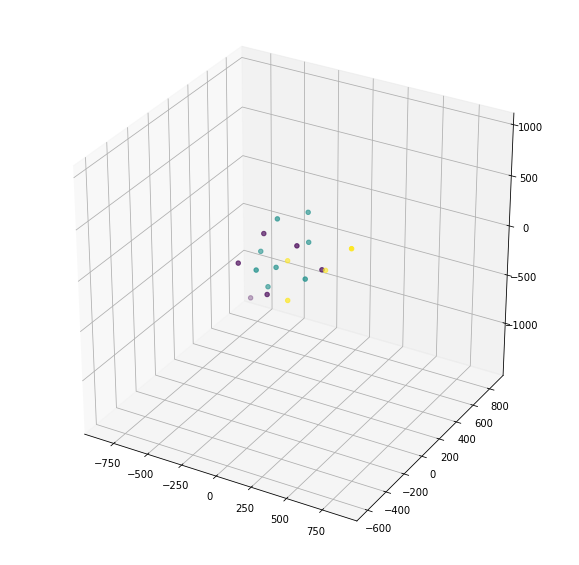

In [22]:

np.argmax(values)

features.columns[features.iloc[np.argmax(values),:] > 0]

X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded.shape

X_embedded


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], c=lbls)